In [14]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
import autosklearn.classification
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
csv_path = '/Users/alex/Desktop/DSI-SF-2-akodate/datasets/titanic/titanic_clean2.csv'
target = 'Pclass'
time = 10

In [16]:
print("CSV path:", csv_path)
print("Target:", target)
print("Time", time)

CSV path: /Users/alex/Desktop/DSI-SF-2-akodate/datasets/titanic/titanic_clean2.csv
Target: Pclass
Time 10


In [17]:
df = pd.read_csv(csv_path)

In [18]:
# df.shape

In [19]:
# df = df.iloc[:, 1:].copy()

In [20]:
# df.head()

In [21]:
# for col in df.columns:
#     print(col, df[col].unique())

In [22]:
# df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [23]:
print("Dataset shape:", df.shape)

Dataset shape: (712, 8)


In [24]:
print("Dtypes:")
print(df.dtypes)

Dtypes:
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [25]:
df_description = df.describe(include='all')

In [53]:
df_description

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


In [26]:
for col in df.columns.difference([target]):
    if not np.issubdtype(df[col], np.number):
        df[col] = LabelEncoder().fit_transform(df[col])

In [27]:
# df.head()

In [28]:
X = df.drop(target, axis=1)
y = df[target]

In [29]:
# print(type(y))
# print(y.shape)

In [30]:
def run_train_test_split(predictors, target):
    test_size = 0.2
    
    print("Train/test split executed, test size =", test_size)
    return train_test_split(predictors, target, test_size=test_size)

X_train, X_test, y_train, y_test = run_train_test_split(X, y)

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Train/test split executed, test size = 0.2
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(569, 7) (569,)
(143, 7) (143,)


In [31]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=10, 
                                                          per_run_time_limit=1, 
                                                          ml_memory_limit=10000)
automl.fit(X_train, y_train)

In [32]:
score = automl.score(X_test,y_test)
score

0.79020979020978999

In [33]:
predictions = automl.predict(X_test)
predictions

array([2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       0, 2, 0, 1, 2])

In [34]:
probas = automl.predict_proba(X_test)
probas[0:5, :]

array([[ 0.06679679,  0.10509441,  0.8281088 ],
       [ 0.0862583 ,  0.12026383,  0.79347787],
       [ 0.56886239,  0.23294798,  0.19818963],
       [ 0.62853197,  0.18147726,  0.18999077],
       [ 0.72474603,  0.10919257,  0.1660614 ]])

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[38  3  1]
 [ 3 19  6]
 [ 2  5 66]]
Normalized confusion matrix
[[ 0.9   0.07  0.02]
 [ 0.11  0.68  0.21]
 [ 0.03  0.07  0.9 ]]


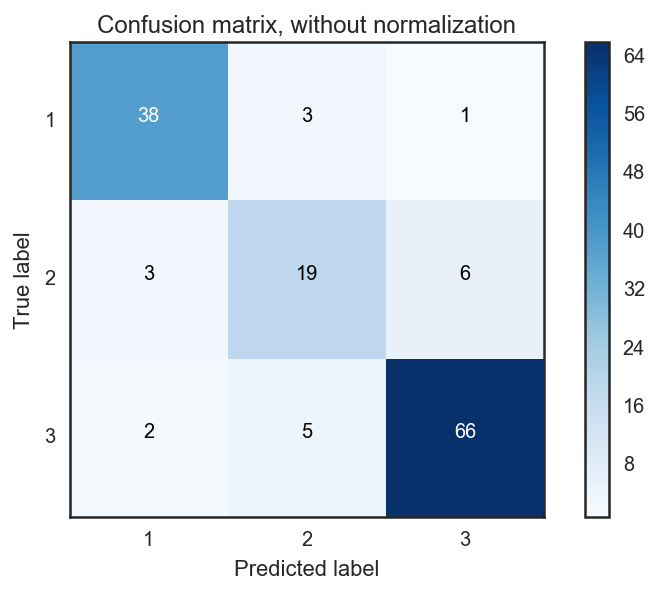

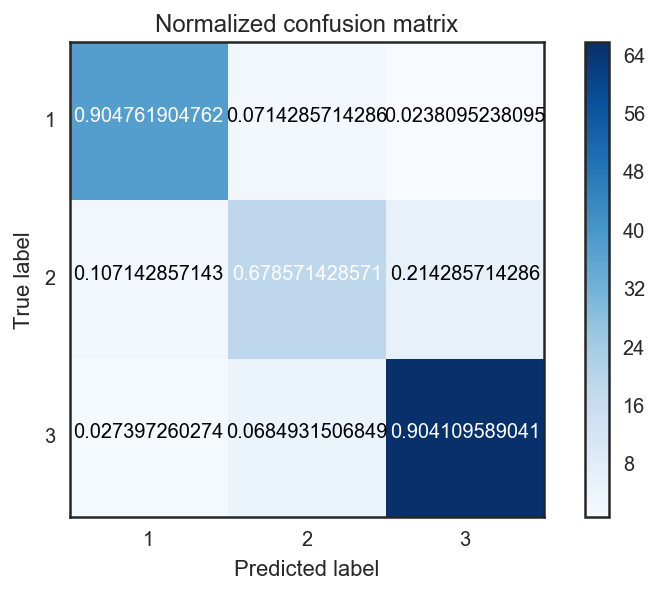

In [36]:
import itertools
from sklearn.metrics import confusion_matrix

plt.style.use('seaborn-white')
class_names = np.unique(y)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [37]:
from scipy.stats import mode
(mode(y_test)[1] / len(y_test))[0]

0.51048951048951052

In [38]:
from sklearn.metrics import precision_recall_fscore_support
PRFS = precision_recall_fscore_support(y_test, predictions)

In [39]:
PRFS

(array([ 0.88,  0.7 ,  0.9 ]),
 array([ 0.9 ,  0.68,  0.9 ]),
 array([ 0.89,  0.69,  0.9 ]),
 array([42, 28, 73]))

In [40]:
np.rot90(np.fliplr(PRFS))

array([[  0.88,   0.9 ,   0.89,  42.  ],
       [  0.7 ,   0.68,   0.69,  28.  ],
       [  0.9 ,   0.9 ,   0.9 ,  73.  ]])

In [41]:
# from scipy import interp
# from itertools import cycle
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize

# y_bin = label_binarize(y_test, classes=range(len(class_names)))

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(len(class_names)):
#     fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

In [42]:
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(len(class_names)), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()    

In [43]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize

# y_bin = label_binarize(y_test, classes=[0, 1, 2])

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(len(class_names)):
#     fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probas[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

encoded_class_names = range(len(class_names))
y_bin = label_binarize(y_test, classes=encoded_class_names)
# if len(class_names) == 2:
#     encoded_class_names = [0]
#     y_bin = np.array([list(binary) + [int(not binary[0])] for binary in y_bin])

# Compute ROC curve and ROC area for each class
fpr = []
tpr = []
roc_auc = []
# for i in encoded_class_names:
f, t, _ = roc_curve(y_bin[:, 0], probas[:, 1])
fpr.append(f.tolist())
tpr.append(t.tolist())
roc_auc.append(auc(f, t))

In [45]:
np.bincount(y_test)[0]

42

In [46]:
probas[0:5]

array([[ 0.07,  0.11,  0.83],
       [ 0.09,  0.12,  0.79],
       [ 0.57,  0.23,  0.2 ],
       [ 0.63,  0.18,  0.19],
       [ 0.72,  0.11,  0.17]])

In [47]:
roc_auc

[0.35926449787835929]

In [48]:
for i in range(len(y_bin[0])):
    print(i)

0
1
2


In [49]:
y_test

array([2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 2, 0, 1, 2])

In [50]:
predictions

array([2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       0, 2, 0, 1, 2])

In [51]:
df_description_table = [row.tolist() for row in df_description.as_matrix()]
[df_description_table[i].insert(0, row_name) for i, row_name in enumerate(df_description.index)]
df_description_table.insert(0, ['Statistic'] + df_description.columns.tolist())

In [52]:
df_description_table

[['Statistic',
  'Survived',
  'Pclass',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Embarked'],
 ['count', 712.0, 712.0, 712, 712.0, 712.0, 712.0, 712.0, 712],
 ['unique', nan, nan, 2, nan, nan, nan, nan, 3],
 ['top', nan, nan, 'male', nan, nan, nan, nan, 'S'],
 ['freq', nan, nan, 453, nan, nan, nan, nan, 554],
 ['mean',
  0.4044943820224719,
  2.240168539325843,
  nan,
  29.64209269662921,
  0.5140449438202247,
  0.43258426966292135,
  34.56725140449432,
  nan],
 ['std',
  0.4911389472541192,
  0.8368543166903479,
  nan,
  14.49293290032352,
  0.9306921267673425,
  0.8541814457454101,
  52.938648174710885,
  nan],
 ['min', 0.0, 1.0, nan, 0.42, 0.0, 0.0, 0.0, nan],
 ['25%', 0.0, 1.0, nan, 20.0, 0.0, 0.0, 8.05, nan],
 ['50%', 0.0, 2.0, nan, 28.0, 0.0, 0.0, 15.64585, nan],
 ['75%', 1.0, 3.0, nan, 38.0, 1.0, 1.0, 33.0, nan],
 ['max', 1.0, 3.0, nan, 80.0, 5.0, 6.0, 512.3292, nan]]